In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import seaborn as sns
from scipy import stats
import warnings

In [2]:
r=pd.read_csv('Coursera_reviews.csv')
r.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [3]:
!pip install vaderSentiment

In [4]:
!pip install wordcloud


In [5]:
!pip install cufflinks

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


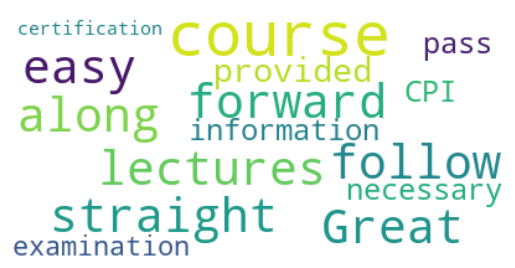

In [7]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(r.reviews[10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

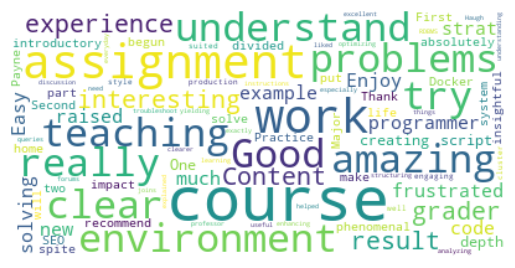

In [8]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(r.sample(10).reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

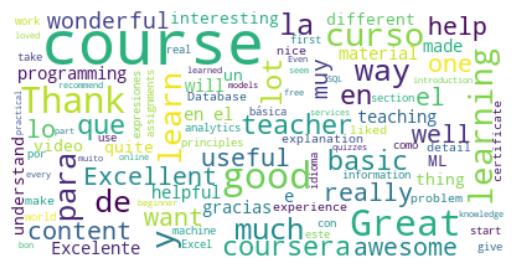

In [9]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(r.sample(100).reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [11]:
neg=[]
neu=[]
pos=[]
comp=[]
for review in r.reviews:
    scores=sentiment_analyzer_scores(str(review))
    neg.append(scores['neg'])
    pos.append(scores['pos'])
    neu.append(scores['neu'])
    comp.append(scores['compound'])

In [12]:
r['s_pos']=pos
r['s_neu']=neu
r['s_neg']=neg
r['s_comp']=comp

In [13]:
r.head()

,reviews,reviewers,date_reviews,rating,course_id,s_pos,s_neu,s_neg,s_comp
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,0.198,0.707,0.094,0.8504
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,0.056,0.944,0.000,0.4404
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,0.161,0.746,0.093,0.6572
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,0.175,0.743,0.081,0.4633
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,0.384,0.616,0.000,0.7823


In [14]:
for i in range(6,11):
    print ("----------------------------------------")
    print("Review : ",r['reviews'][i])
    print("Positivity:",r['s_pos'][i])
    print("Negativity:",r['s_neg'][i])
    print ("----------------------------------------")

----------------------------------------
Review :  Solid presentation all the way through. I really appreciated the intermittent questions that popped up to check on learning as well the regular (but not needless) quizzing. There was visuals such as charts / .ppt for those of us more visually inclined as well as a transcript below the video that followed along with the presentation!
Positivity: 0.135
Negativity: 0.0
----------------------------------------
----------------------------------------
Review :  Probably the best certification course I've taken in this respect. The course is planned out carefully, and I believe gave me everything I needed to ace my exam the first time around. The trainer for the majority of the course was awesome. She delivered the material in a great, professional mannor, but was never boring or monotoned. 
Positivity: 0.212
Negativity: 0.0
----------------------------------------
----------------------------------------
Review :  The ProctorU.com system to

C:\Users\sande\AppData\Local\Temp\ipykernel_23972\1222040956.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Positive Reviews')

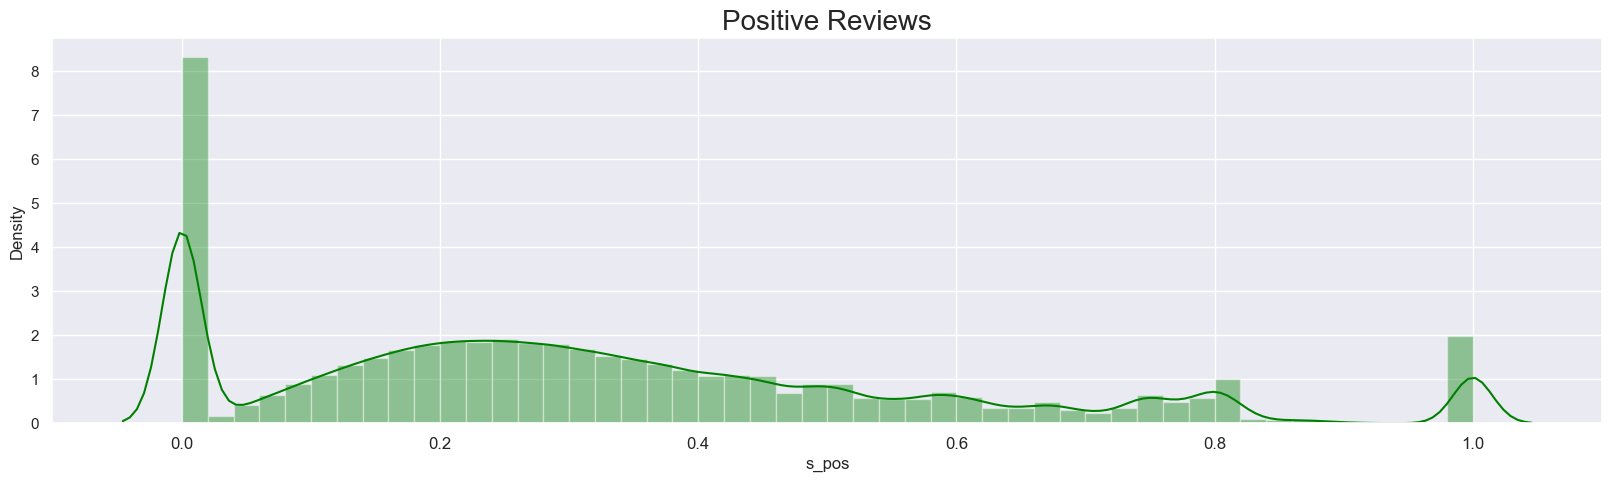

In [15]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_pos'],color='green')
p.axes.set_title("Positive Reviews",fontsize=20)

C:\Users\sande\AppData\Local\Temp\ipykernel_23972\353002832.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Negative Reviews')

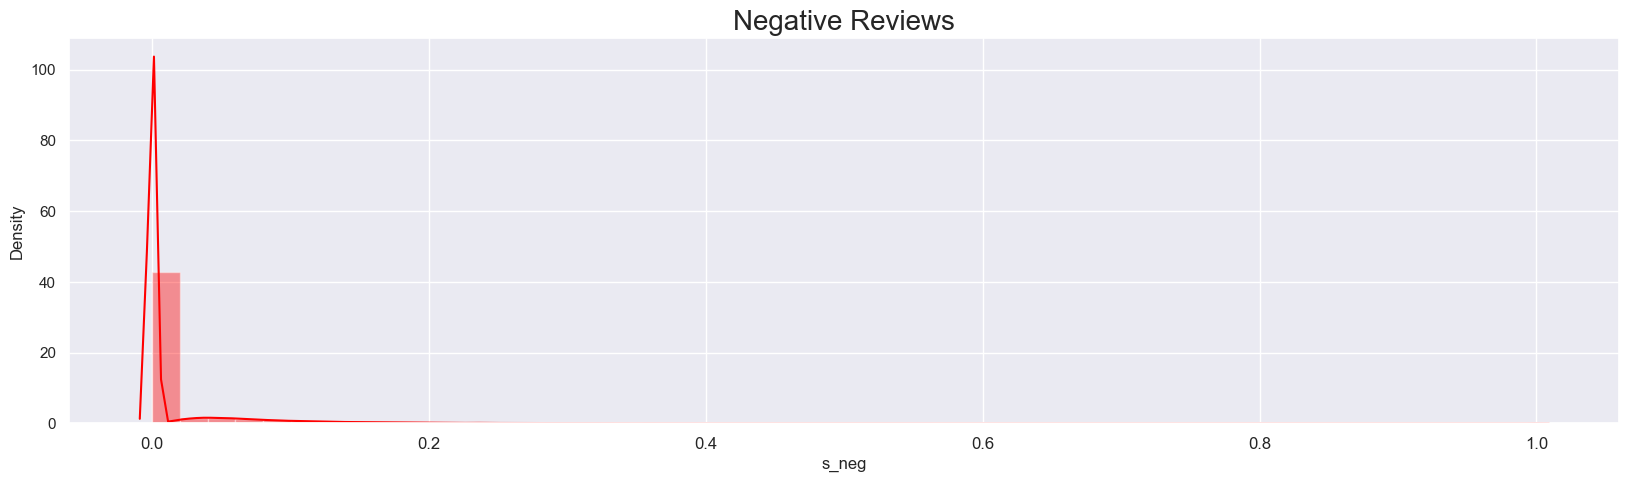

In [16]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_neg'],color='red')
p.axes.set_title("Negative Reviews",fontsize=20)

C:\Users\sande\AppData\Local\Temp\ipykernel_23972\2059159569.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Neutral Reviews')

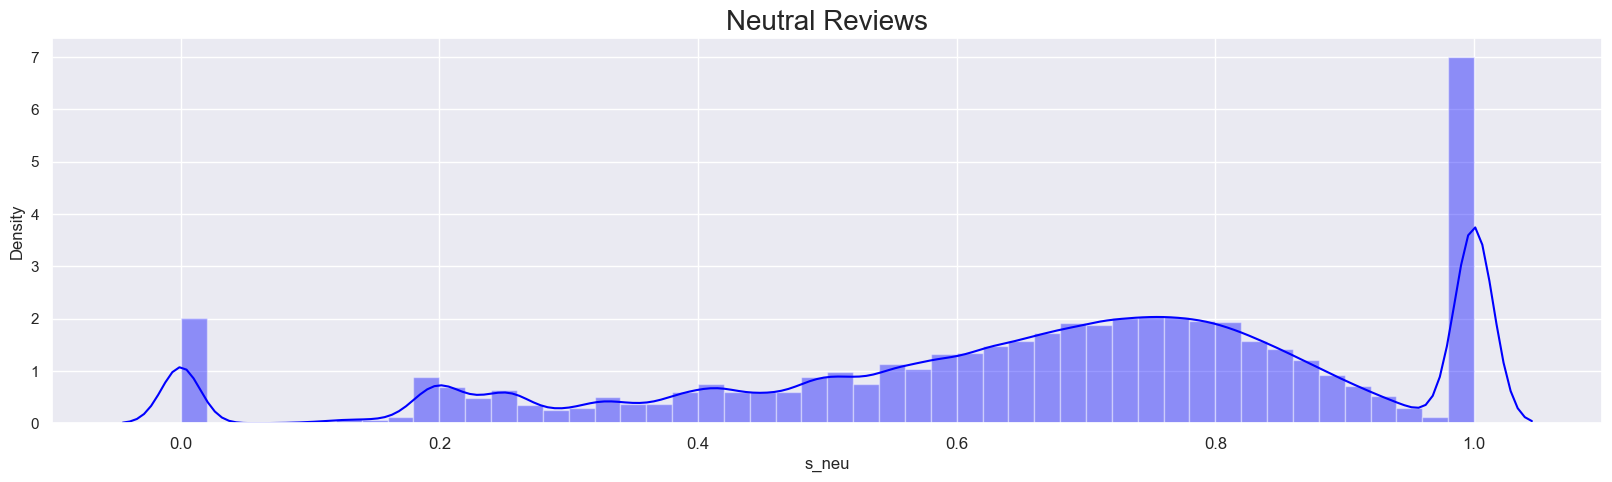

In [17]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_neu'],color='blue')
p.axes.set_title("Neutral Reviews",fontsize=20)

C:\Users\sande\AppData\Local\Temp\ipykernel_23972\1953963535.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Neutral Reviews')

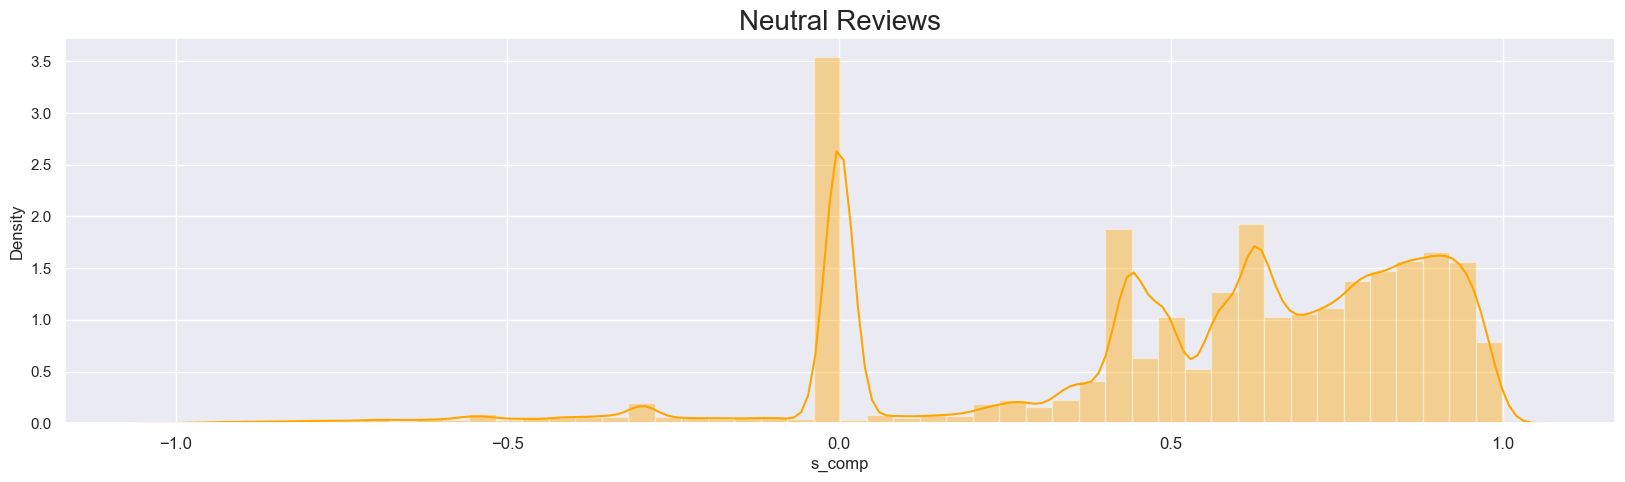

In [18]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_comp'],color='orange')
p.axes.set_title("Neutral Reviews",fontsize=20)

In [19]:
course_wise = r.groupby('course_id')[['s_comp', 'rating']].mean()


In [20]:
course_wise

,s_comp,rating
course_id,,
aboriginal-education,0.646759,4.604061
access-control-sscp,0.427434,4.572519
accounting-analytics,0.521685,4.426991
accounting-data-analytics-python,0.500650,3.500000
actualizacion-manejo-diabetes-tipo-2,-0.033179,4.867052
...,...,...
womens-health-human-rights,0.656404,4.894231
write-a-feature-length-screenplay-for-film-or-television,0.636376,4.666667
write-your-first-novel,0.486800,3.942308


C:\Users\sande\AppData\Local\Temp\ipykernel_23972\2380556374.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sande\AppData\Local\Temp\ipykernel_23972\2380556374.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updat

Text(0.5, 1.0, 'Course wise Actual and Sentiment Scores')

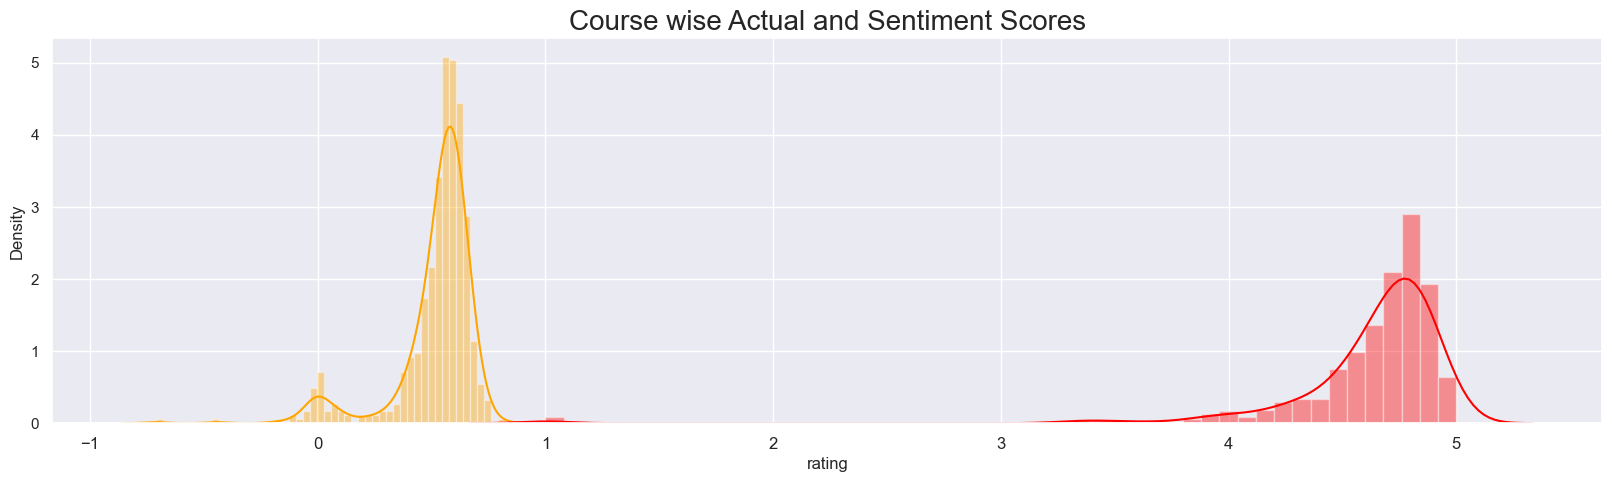

In [21]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(course_wise['s_comp'],color='orange')
p=sns.distplot(course_wise['rating'],color='red')
p.axes.set_title("Course wise Actual and Sentiment Scores",fontsize=20)

Text(0.5, 1.0, 'Given rating and sentiment rating co-relation')

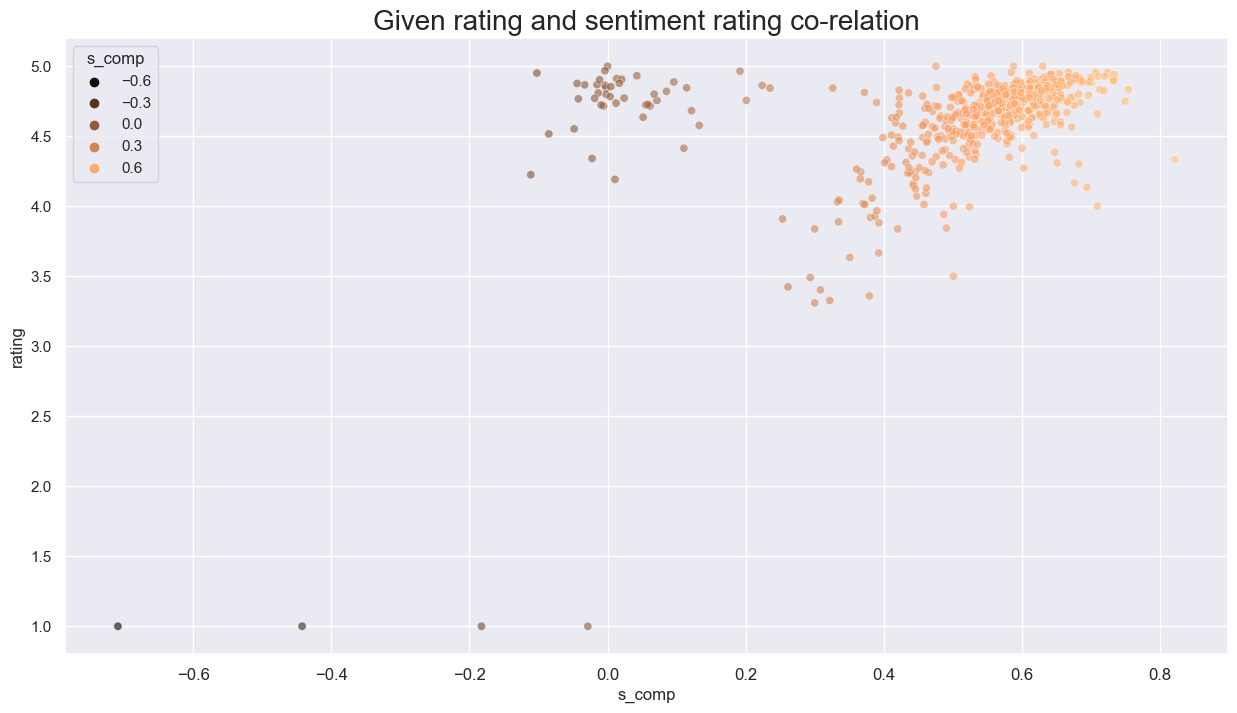

In [22]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(fontsize=12)
p=sns.scatterplot(data=course_wise,x='s_comp',y='rating',palette='copper',hue='s_comp',alpha=0.6)
p.axes.set_title("Given rating and sentiment rating co-relation",fontsize=20)